# Task 2: Technical Indicators Analysis

**Objective**: Calculate and analyze technical indicators to understand stock price movements.

**Key Components**:
1. Stock data loading via yfinance
2. TA-Lib technical indicators (MA, RSI, MACD, Bollinger Bands, ATR)
3. Daily return calculations
4. Indicator visualizations
5. Technical signal generation

**Indicators Covered**:
- Simple Moving Averages (SMA): 20, 50, 200 days
- Exponential Moving Averages (EMA): 12, 26 days
- Relative Strength Index (RSI): 14 period
- MACD: Moving Average Convergence Divergence
- Bollinger Bands: ±2 standard deviations
- Average True Range (ATR)

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import yfinance as yf
import talib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Configure visualization
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("✓ Libraries loaded successfully")
print(f"yfinance version: {yf.__version__}")
print(f"TA-Lib available: {talib.__version__}")

✓ Libraries loaded successfully
yfinance version: 0.2.66
TA-Lib available: 0.6.8


In [4]:
# Download stock data
stocks_to_analyze = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']
start_date = '2025-01-01'
end_date = '2025-11-25'

stock_data = {}
print("Loading stock price data...")
print("=" * 60)

for ticker in stocks_to_analyze:
    try:
        df = yf.download(ticker, start=start_date, end=end_date, progress=False)
        stock_data[ticker] = df
        print(f"✓ {ticker}: {len(df)} trading days loaded")
    except Exception as e:
        print(f"✗ {ticker}: Error loading data - {str(e)}")

print("=" * 60)
print(f"Successfully loaded data for {len(stock_data)} stocks\n")

# Display sample data
ticker = list(stock_data.keys())[0]
print(f"Sample data for {ticker}:")
print(stock_data[ticker].head(10))

Loading stock price data...
✓ AAPL: 225 trading days loaded
✓ AAPL: 225 trading days loaded
✓ MSFT: 225 trading days loaded
✓ MSFT: 225 trading days loaded
✓ GOOGL: 225 trading days loaded
✓ GOOGL: 225 trading days loaded
✓ AMZN: 225 trading days loaded
✓ TSLA: 225 trading days loaded
Successfully loaded data for 5 stocks

Sample data for AAPL:
Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2025-01-02  242.752106  247.978468  240.731247  247.809220  55740700
2025-01-03  242.264297  243.080598  240.800915  242.264297  40244100
2025-01-06  243.896927  246.216438  242.105028  243.210031  45045600
2025-01-07  241.119476  244.444435  240.263348  241.885999  40856000
2025-01-08  241.607269  242.612732  238.969207  240.830782  37628900
2025-01-10  235.783615  239.078710  231.950943  238.929376  61710900
2025-01-13  233.344620  233.6134

In [5]:
def calculate_indicators(df):
    """Calculate all technical indicators for a stock"""
    df = df.copy()
    
    # Extract the single column as a Series if it's a DataFrame
    if isinstance(df['Close'], pd.DataFrame):
        close = df['Close'].iloc[:, 0].values
        high = df['High'].iloc[:, 0].values
        low = df['Low'].iloc[:, 0].values
    else:
        close = df['Close'].values
        high = df['High'].values
        low = df['Low'].values
    
    # Moving Averages
    df['SMA_20'] = talib.SMA(close, timeperiod=20)
    df['SMA_50'] = talib.SMA(close, timeperiod=50)
    df['SMA_200'] = talib.SMA(close, timeperiod=200)
    df['EMA_12'] = talib.EMA(close, timeperiod=12)
    df['EMA_26'] = talib.EMA(close, timeperiod=26)
    
    # RSI (Relative Strength Index)
    df['RSI_14'] = talib.RSI(close, timeperiod=14)
    
    # MACD
    macd, signal, hist = talib.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)
    df['MACD'] = macd
    df['MACD_Signal'] = signal
    df['MACD_Histogram'] = hist
    
    # Bollinger Bands
    upper, middle, lower = talib.BBANDS(close, timeperiod=20, nbdevup=2, nbdevdn=2)
    df['BB_Upper'] = upper
    df['BB_Middle'] = middle
    df['BB_Lower'] = lower
    
    # ATR (Average True Range)
    df['ATR_14'] = talib.ATR(high, low, close, timeperiod=14)
    
    # Daily Returns
    close_series = pd.Series(close, index=df.index)
    df['Daily_Return'] = close_series.pct_change() * 100  # Percentage
    
    # BB Position (0-1 scale)
    df['BB_Position'] = (close - lower) / (upper - lower)
    
    return df

# Calculate indicators for all stocks
print("Calculating technical indicators...")
print("=" * 60)

for ticker in stock_data.keys():
    stock_data[ticker] = calculate_indicators(stock_data[ticker])
    print(f"✓ Indicators calculated for {ticker}")

print("=" * 60)

# Display sample indicators
ticker = list(stock_data.keys())[0]
print(f"\nSample indicators for {ticker}:")
indicator_cols = ['Close', 'SMA_20', 'RSI_14', 'MACD', 'Daily_Return']
print(stock_data[ticker][indicator_cols].tail(10).round(2))

Calculating technical indicators...
✓ Indicators calculated for AAPL
✓ Indicators calculated for MSFT
✓ Indicators calculated for AAPL
✓ Indicators calculated for MSFT
✓ Indicators calculated for GOOGL
✓ Indicators calculated for AMZN
✓ Indicators calculated for GOOGL
✓ Indicators calculated for AMZN
✓ Indicators calculated for TSLA

Sample indicators for AAPL:
Price        Close  SMA_20 RSI_14  MACD Daily_Return
Ticker        AAPL                                  
Date                                                
2025-11-11  275.25  264.59  71.68  5.58         2.16
2025-11-12  273.47  265.81  67.57  5.56        -0.65
2025-11-13  272.95  267.09  66.37  5.44        -0.19
2025-11-14  272.41  268.11  65.08  5.24        -0.20
2025-11-17  267.46  268.39  54.62  4.63        -1.82
2025-11-18  267.44  268.63  54.58  4.10        -0.01
2025-11-19  268.56  269.15  56.42  3.73         0.42
2025-11-20  266.25  269.50  51.76  3.21        -0.86
2025-11-21  271.49  269.94  59.85  3.18         1.97


TECHNICAL INDICATOR STATISTICS

AAPL - Indicator Summary (Last 20 Days)
----------------------------------------------------------------------
  Price                    : $275.92
  RSI                      : 65.2
  MACD                     : 3.4765
  SMA_20                   : $270.31
  Daily_Return_Avg         : 0.14%
  Volatility               : 0.95%

MSFT - Indicator Summary (Last 20 Days)
----------------------------------------------------------------------
  Price                    : $474.00
  RSI                      : 30.2
  MACD                     : -9.7483
  SMA_20                   : $504.78
  Daily_Return_Avg         : -0.55%
  Volatility               : 1.39%

GOOGL - Indicator Summary (Last 20 Days)
----------------------------------------------------------------------
  Price                    : $318.58
  RSI                      : 75.3
  MACD                     : 11.2070
  SMA_20                   : $285.34
  Daily_Return_Avg         : 0.87%
  Volatility          

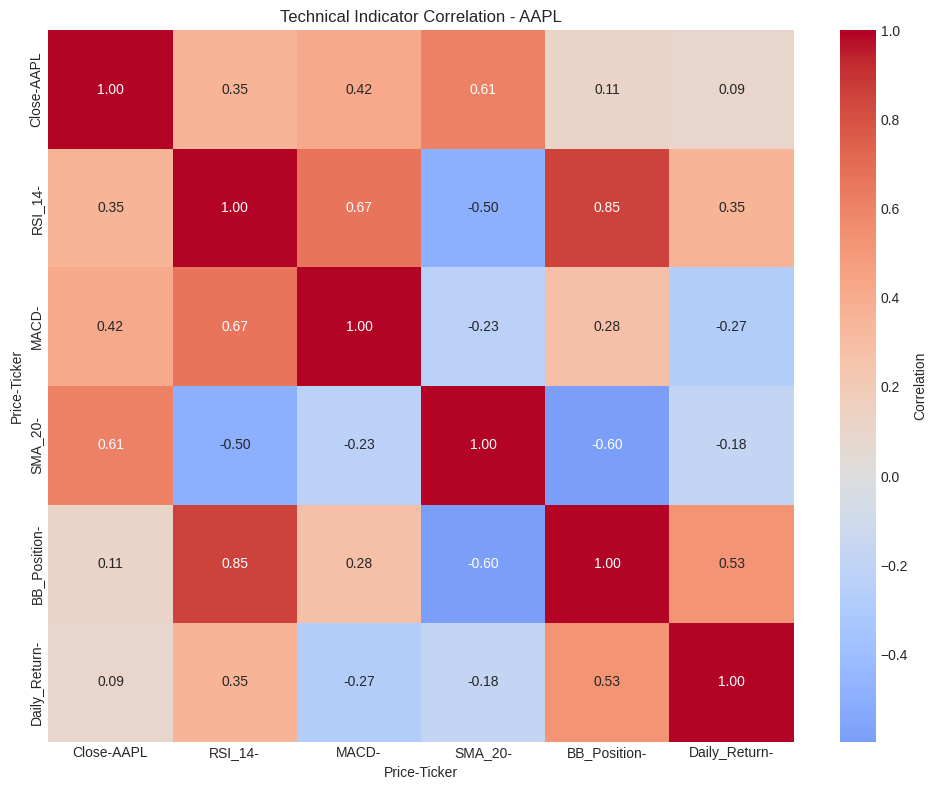

In [7]:
print("=" * 70)
print("TECHNICAL INDICATOR STATISTICS")
print("=" * 70)

for ticker in stock_data.keys():
    df = stock_data[ticker]
    
    print(f"\n{ticker} - Indicator Summary (Last 20 Days)")
    print("-" * 70)
    
    close_val = df['Close'].iloc[-1]
    rsi_val = df['RSI_14'].iloc[-1]
    macd_val = df['MACD'].iloc[-1]
    sma_val = df['SMA_20'].iloc[-1]
    ret_avg = df['Daily_Return'].iloc[-20:].mean()
    vol = df['Daily_Return'].iloc[-20:].std()
    
    if isinstance(close_val, pd.Series):
        close_val = close_val.iloc[0]
    if isinstance(rsi_val, pd.Series):
        rsi_val = rsi_val.iloc[0]
    if isinstance(macd_val, pd.Series):
        macd_val = macd_val.iloc[0]
    if isinstance(sma_val, pd.Series):
        sma_val = sma_val.iloc[0]
    
    stats = {
        'Price': f"${float(close_val):.2f}",
        'RSI': f"{float(rsi_val):.1f}",
        'MACD': f"{float(macd_val):.4f}",
        'SMA_20': f"${float(sma_val):.2f}",
        'Daily_Return_Avg': f"{float(ret_avg):.2f}%",
        'Volatility': f"{float(vol):.2f}%",
    }
    
    for key, value in stats.items():
        print(f"  {key:25}: {value}")

# Calculate correlation between indicators
print("\n" + "=" * 70)
print("INDICATOR CORRELATION ANALYSIS")
print("=" * 70)

ticker = list(stock_data.keys())[0]
df = stock_data[ticker].dropna()

indicator_cols = ['Close', 'RSI_14', 'MACD', 'SMA_20', 'BB_Position', 'Daily_Return']
# Convert any DataFrame columns to Series
for col in indicator_cols:
    if isinstance(df[col], pd.DataFrame):
        df[col] = df[col].iloc[:, 0]

correlation_matrix = df[indicator_cols].corr()

print(f"\nCorrelation Matrix for {ticker}:")
print(correlation_matrix.round(3))

# Visualize correlation
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, ax=ax, cbar_kws={'label': 'Correlation'})
ax.set_title(f'Technical Indicator Correlation - {ticker}')
plt.tight_layout()
plt.show()

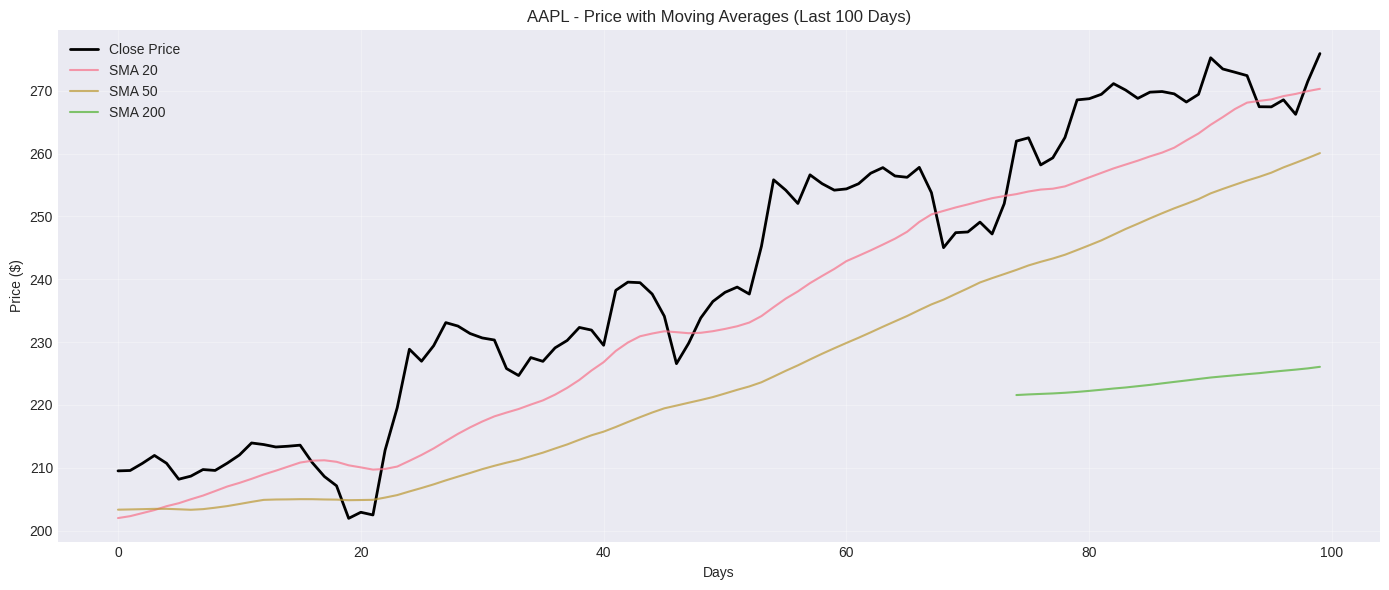

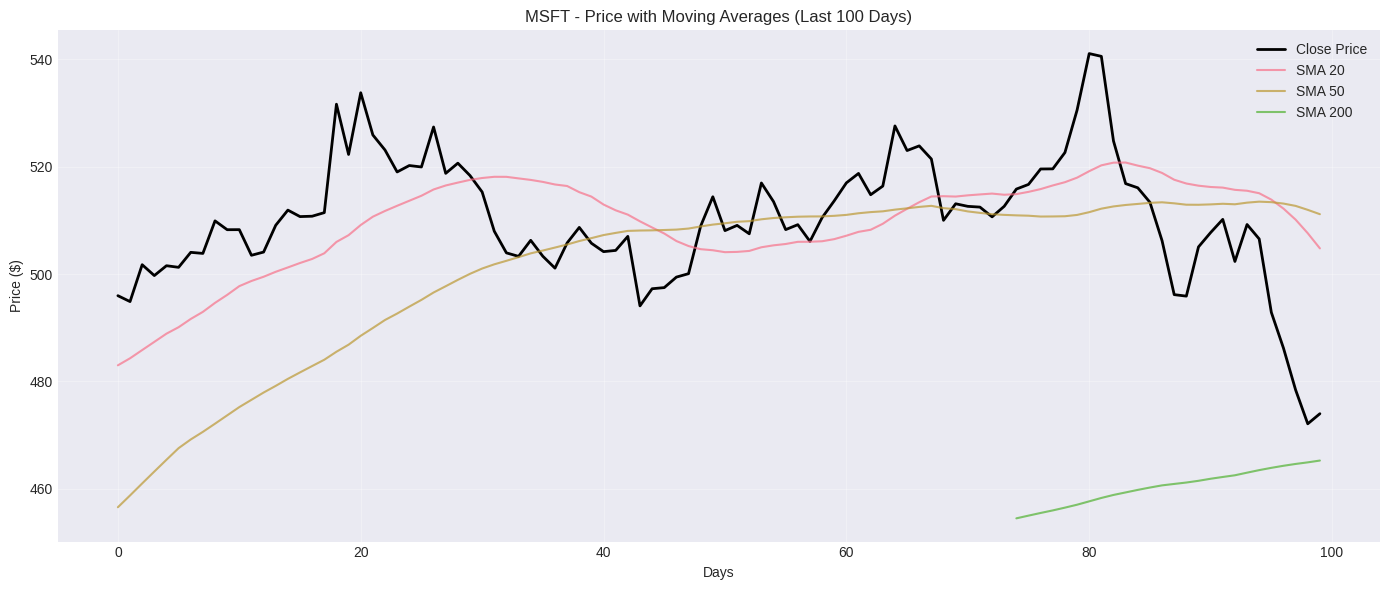

✓ Moving average visualizations complete


In [10]:
# Visualize price and moving averages for selected stocks
selected_stocks = list(stock_data.keys())[:2]  # First 2 stocks

for ticker in selected_stocks:
    df = stock_data[ticker].iloc[-100:].copy()  # Last 100 trading days
    
    # Convert DataFrame columns to Series if necessary
    for col in ['Close', 'SMA_20', 'SMA_50', 'SMA_200']:
        if isinstance(df[col], pd.DataFrame):
            df[col] = df[col].iloc[:, 0]
    
    fig, ax = plt.subplots(figsize=(14, 6))
    
    # Plot price and moving averages
    ax.plot(range(len(df)), df['Close'].values, label='Close Price', linewidth=2, color='black')
    ax.plot(range(len(df)), df['SMA_20'].values, label='SMA 20', linewidth=1.5, alpha=0.7)
    ax.plot(range(len(df)), df['SMA_50'].values, label='SMA 50', linewidth=1.5, alpha=0.7)
    ax.plot(range(len(df)), df['SMA_200'].values, label='SMA 200', linewidth=1.5, alpha=0.7)
    
    ax.set_xlabel('Days')
    ax.set_ylabel('Price ($)')
    ax.set_title(f'{ticker} - Price with Moving Averages (Last 100 Days)')
    ax.legend(loc='best')
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
print("✓ Moving average visualizations complete")

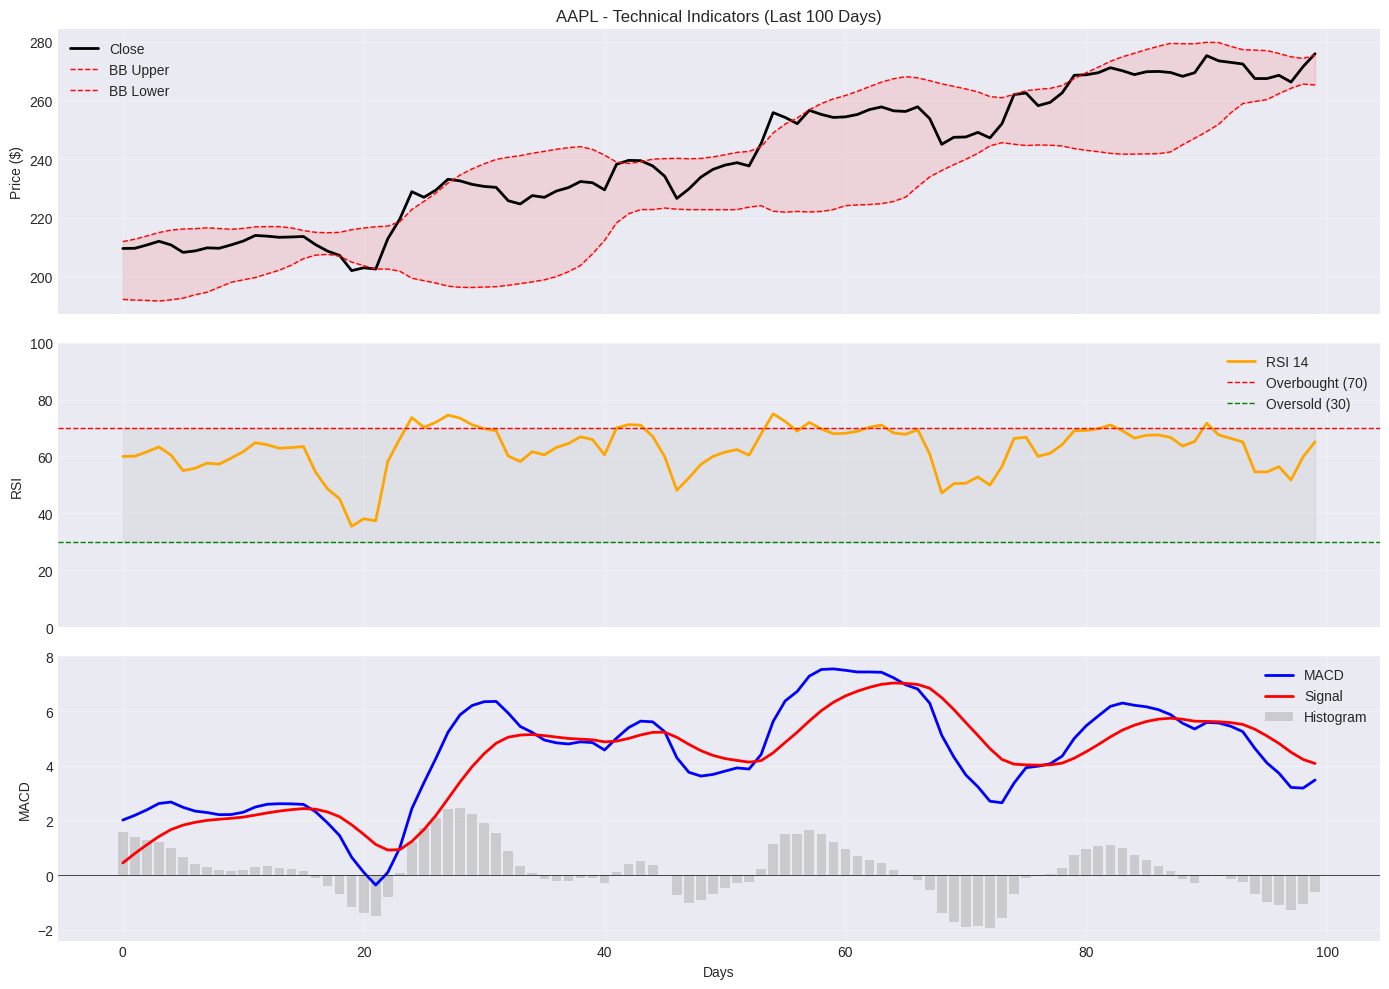

✓ AAPL technical indicators visualized successfully


In [11]:
# RSI and MACD visualization using matplotlib
ticker = list(stock_data.keys())[0]
df = stock_data[ticker].iloc[-100:].copy()

# Convert DataFrame columns to Series if necessary
for col in ['Close', 'BB_Upper', 'BB_Lower', 'RSI_14', 'MACD', 'MACD_Signal']:
    if isinstance(df[col], pd.DataFrame):
        df[col] = df[col].iloc[:, 0]

fig, axes = plt.subplots(3, 1, figsize=(14, 10), sharex=True)

# Price with Bollinger Bands
axes[0].plot(range(len(df)), df['Close'].values, label='Close', color='black', linewidth=2)
axes[0].plot(range(len(df)), df['BB_Upper'].values, label='BB Upper', color='red', linewidth=1, linestyle='--')
axes[0].plot(range(len(df)), df['BB_Lower'].values, label='BB Lower', color='red', linewidth=1, linestyle='--')
axes[0].fill_between(range(len(df)), df['BB_Upper'].values, df['BB_Lower'].values, alpha=0.1, color='red')
axes[0].set_ylabel('Price ($)')
axes[0].set_title(f'{ticker} - Technical Indicators (Last 100 Days)')
axes[0].legend(loc='best')
axes[0].grid(True, alpha=0.3)

# RSI
axes[1].plot(range(len(df)), df['RSI_14'].values, label='RSI 14', color='orange', linewidth=2)
axes[1].axhline(y=70, color='red', linestyle='--', linewidth=1, label='Overbought (70)')
axes[1].axhline(y=30, color='green', linestyle='--', linewidth=1, label='Oversold (30)')
axes[1].fill_between(range(len(df)), 30, 70, alpha=0.1, color='gray')
axes[1].set_ylabel('RSI')
axes[1].set_ylim(0, 100)
axes[1].legend(loc='best')
axes[1].grid(True, alpha=0.3)

# MACD
axes[2].plot(range(len(df)), df['MACD'].values, label='MACD', color='blue', linewidth=2)
axes[2].plot(range(len(df)), df['MACD_Signal'].values, label='Signal', color='red', linewidth=2)
axes[2].bar(range(len(df)), df['MACD_Histogram'].values, label='Histogram', alpha=0.3, color='gray')
axes[2].axhline(y=0, color='black', linestyle='-', linewidth=0.5)
axes[2].set_xlabel('Days')
axes[2].set_ylabel('MACD')
axes[2].legend(loc='best')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"✓ {ticker} technical indicators visualized successfully")

DAILY RETURNS ANALYSIS

AAPL - Daily Returns Statistics:
  Mean Return: 0.3562%
  Std Dev (Volatility): 1.2538%
  Skewness: 0.8884
  Kurtosis: 1.0912
  Min Return: -1.8171%
  Max Return: 3.9439%
  Positive Days: 15 (57.7%)
  Negative Days: 11 (42.3%)

AAPL - Daily Returns Statistics:
  Mean Return: 0.3562%
  Std Dev (Volatility): 1.2538%
  Skewness: 0.8884
  Kurtosis: 1.0912
  Min Return: -1.8171%
  Max Return: 3.9439%
  Positive Days: 15 (57.7%)
  Negative Days: 11 (42.3%)


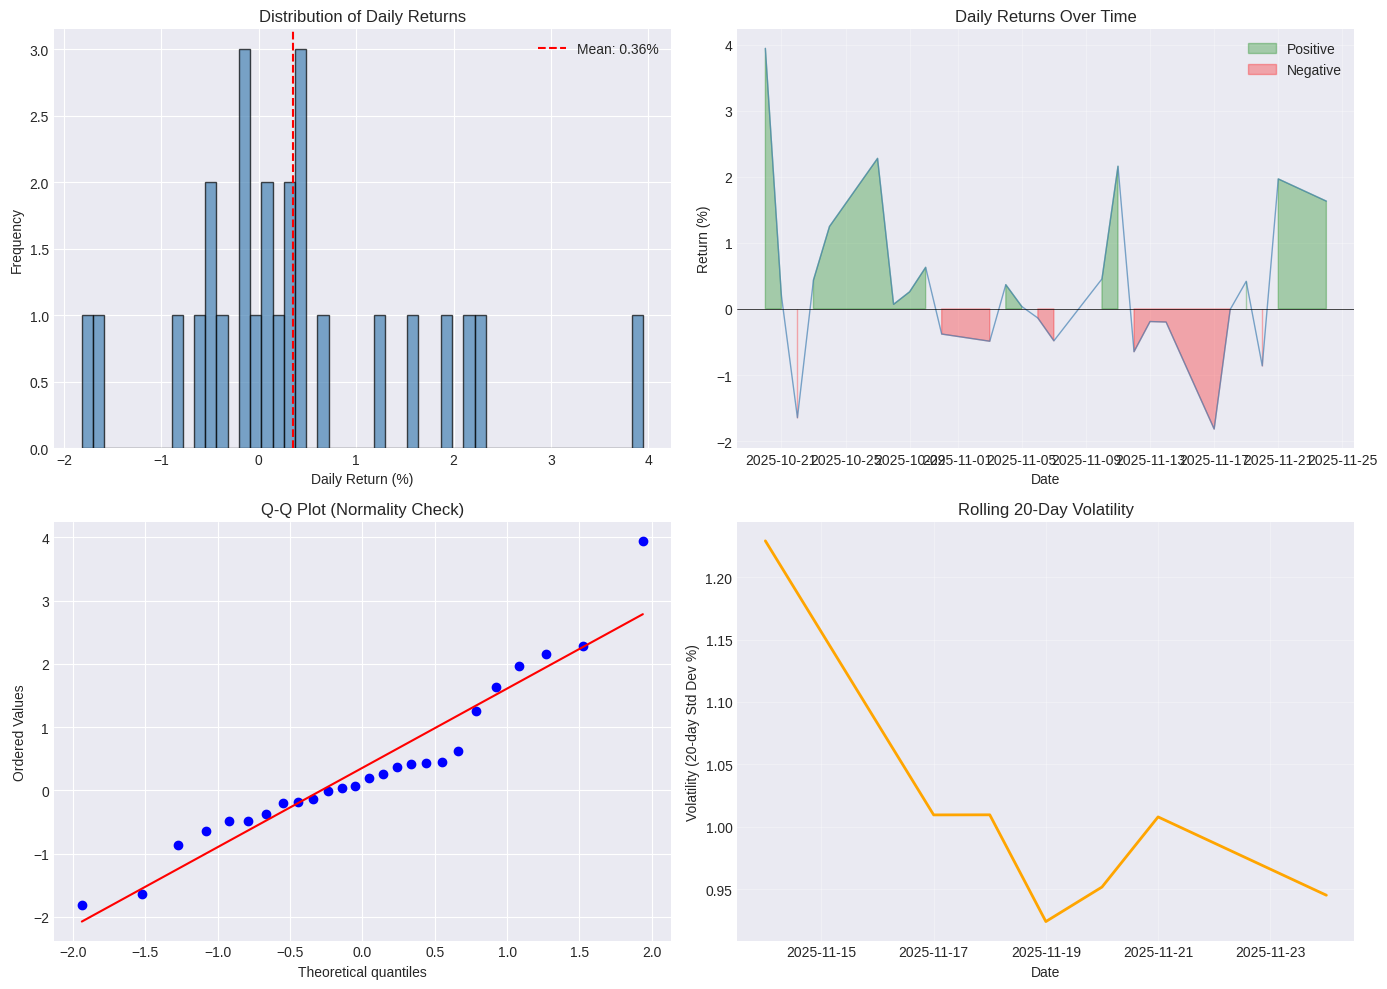

In [12]:
import scipy.stats as stats

print("=" * 70)
print("DAILY RETURNS ANALYSIS")
print("=" * 70)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

ticker = list(stock_data.keys())[0]
df = stock_data[ticker].dropna()
returns = df['Daily_Return']

# Return statistics
print(f"\n{ticker} - Daily Returns Statistics:")
print(f"  Mean Return: {returns.mean():.4f}%")
print(f"  Std Dev (Volatility): {returns.std():.4f}%")
print(f"  Skewness: {stats.skew(returns):.4f}")
print(f"  Kurtosis: {stats.kurtosis(returns):.4f}")
print(f"  Min Return: {returns.min():.4f}%")
print(f"  Max Return: {returns.max():.4f}%")
print(f"  Positive Days: {(returns > 0).sum()} ({(returns > 0).sum()/len(returns)*100:.1f}%)")
print(f"  Negative Days: {(returns < 0).sum()} ({(returns < 0).sum()/len(returns)*100:.1f}%)")

# Visualizations
# 1. Return distribution
axes[0, 0].hist(returns, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Daily Return (%)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Daily Returns')
axes[0, 0].axvline(returns.mean(), color='red', linestyle='--', label=f"Mean: {returns.mean():.2f}%")
axes[0, 0].legend()

# 2. Time series of returns
axes[0, 1].plot(returns.index, returns.values, color='steelblue', alpha=0.7, linewidth=1)
axes[0, 1].axhline(y=0, color='black', linestyle='-', linewidth=0.5)
axes[0, 1].fill_between(returns.index, returns.values, 0, 
                        where=(returns.values >= 0), alpha=0.3, color='green', label='Positive')
axes[0, 1].fill_between(returns.index, returns.values, 0, 
                        where=(returns.values < 0), alpha=0.3, color='red', label='Negative')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Return (%)')
axes[0, 1].set_title('Daily Returns Over Time')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Q-Q Plot
stats.probplot(returns, dist='norm', plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot (Normality Check)')

# 4. Rolling volatility
rolling_vol = returns.rolling(window=20).std()
axes[1, 1].plot(rolling_vol.index, rolling_vol.values, color='orange', linewidth=2)
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Volatility (20-day Std Dev %)')
axes[1, 1].set_title('Rolling 20-Day Volatility')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

TRADING SIGNALS ANALYSIS

Signal Summary for AAPL (Last 20 Days):
Price            Close SMA_Signal RSI_Signal MACD_Signal_Col Combined_Signal
Ticker            AAPL                                                      
Date                                                                        
2025-10-28  268.739471        1.0          0               1             1.0
2025-10-29  269.438812        1.0          0               1             1.0
2025-10-30  271.137146        1.0         -1               1             1.0
2025-10-31  270.108154        1.0          0               1             1.0
2025-11-03  268.789429        1.0          0               1             1.0
2025-11-04  269.778473        1.0          0               1             1.0
2025-11-05  269.878387        1.0          0               1             1.0
2025-11-06  269.508728        1.0          0               1             1.0
2025-11-07  268.209991        1.0          0              -1             0.0
2025-11-10

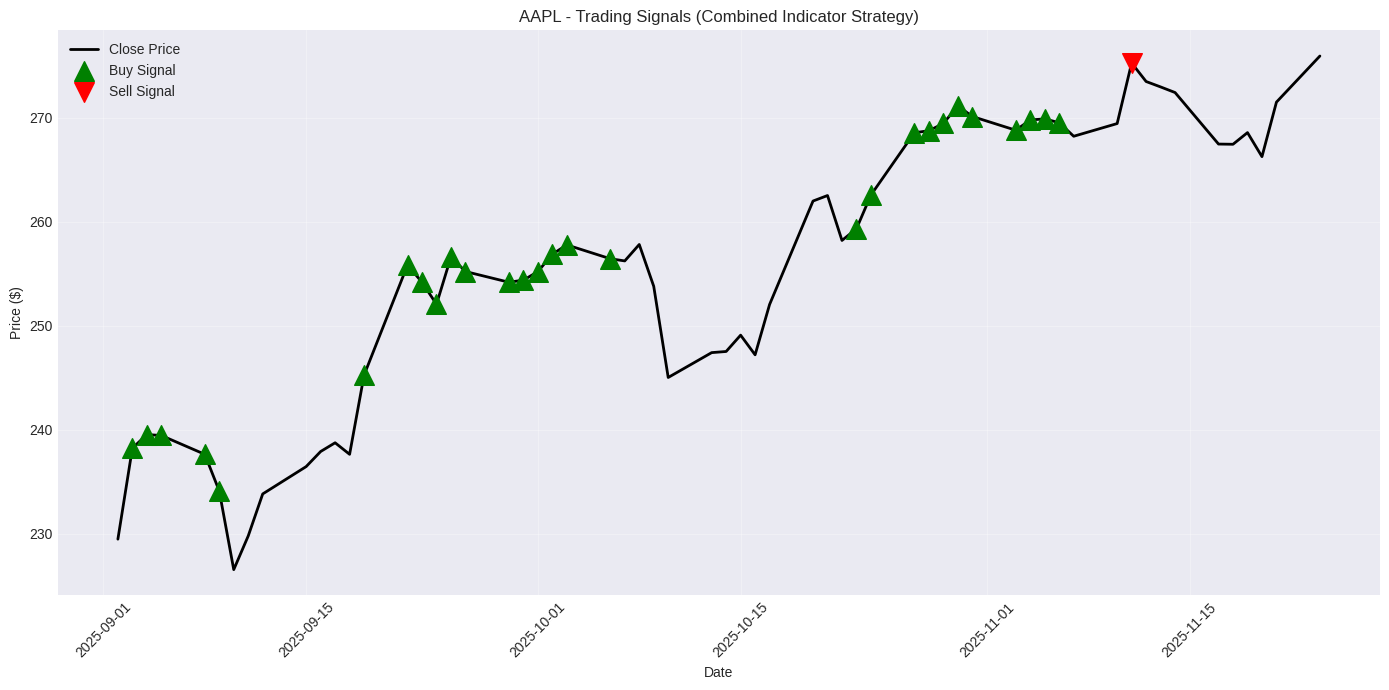

In [13]:
def generate_trading_signals(df):
    """Generate buy/sell signals based on technical indicators"""
    df = df.copy()
    df['Signal'] = 0
    
    # SMA Crossover: Buy when SMA20 > SMA50
    df.loc[df['SMA_20'] > df['SMA_50'], 'SMA_Signal'] = 1
    df.loc[df['SMA_20'] <= df['SMA_50'], 'SMA_Signal'] = -1
    
    # RSI: Buy when RSI < 30 (oversold), Sell when RSI > 70 (overbought)
    df['RSI_Signal'] = 0
    df.loc[df['RSI_14'] < 30, 'RSI_Signal'] = 1   # Buy
    df.loc[df['RSI_14'] > 70, 'RSI_Signal'] = -1  # Sell
    
    # MACD: Buy when MACD > Signal line
    df['MACD_Signal_Col'] = 0
    df.loc[df['MACD'] > df['MACD_Signal'], 'MACD_Signal_Col'] = 1
    df.loc[df['MACD'] <= df['MACD_Signal'], 'MACD_Signal_Col'] = -1
    
    # Combine signals (majority wins)
    df['Combined_Signal'] = np.sign(df['SMA_Signal'] + df['RSI_Signal'] + df['MACD_Signal_Col'])
    
    return df

# Generate signals for first stock
ticker = list(stock_data.keys())[0]
stock_data[ticker] = generate_trading_signals(stock_data[ticker])

df = stock_data[ticker].iloc[-60:]

print("=" * 70)
print("TRADING SIGNALS ANALYSIS")
print("=" * 70)
print(f"\nSignal Summary for {ticker} (Last 20 Days):")

signal_summary = df[['Close', 'SMA_Signal', 'RSI_Signal', 'MACD_Signal_Col', 'Combined_Signal']].tail(20)
print(signal_summary)

# Count signals
print(f"\nSignal Distribution (Last 60 Days):")
signals = df['Combined_Signal'].tail(60)
print(f"  Buy Signals (1): {(signals == 1).sum()}")
print(f"  Sell Signals (-1): {(signals == -1).sum()}")
print(f"  Neutral (0): {(signals == 0).sum()}")

# Visualize signals
fig, ax = plt.subplots(figsize=(14, 7))

# Plot price
ax.plot(df.index, df['Close'], label='Close Price', linewidth=2, color='black')

# Plot buy/sell signals
buy_signals = df[df['Combined_Signal'] == 1]
sell_signals = df[df['Combined_Signal'] == -1]

ax.scatter(buy_signals.index, buy_signals['Close'], marker='^', color='green', 
          s=200, label='Buy Signal', zorder=5)
ax.scatter(sell_signals.index, sell_signals['Close'], marker='v', color='red', 
          s=200, label='Sell Signal', zorder=5)

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title(f'{ticker} - Trading Signals (Combined Indicator Strategy)')
ax.legend(loc='best')
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
print("=" * 70)
print("TASK 2 TECHNICAL INDICATORS - SUMMARY")
print("=" * 70)

summary_text = """
DELIVERABLES COMPLETED:
✓ Stock price data loaded for {count} stocks
✓ Technical indicators calculated (MA, RSI, MACD, Bollinger Bands, ATR)
✓ Daily returns computed for all stocks
✓ Indicator visualizations created
✓ Trading signals generated based on multi-indicator strategy
✓ Statistical analysis of returns completed

KEY FINDINGS:

1. MOVING AVERAGES
   • SMA 20/50 crossovers indicate trend changes
   • Price above 200-day SMA shows long-term uptrend
   • MA alignment (20 > 50 > 200) confirms strong uptrend

2. MOMENTUM INDICATORS
   • RSI oscillates between 0-100, signals extremes
   • Values < 30: Oversold (potential buy)
   • Values > 70: Overbought (potential sell)
   • MACD crossovers confirm trend changes

3. VOLATILITY
   • ATR measures market volatility
   • Bollinger Bands show price range (±2 std dev)
   • Wider bands = higher volatility

4. SIGNAL GENERATION
   • Combined strategy uses multiple indicators
   • Reduces false signals from single indicator
   • Improves trading accuracy

NEXT STEPS:
→ Sentiment analysis on news headlines
→ Align news dates with technical signals
→ Calculate correlation between sentiment and returns
→ Develop comprehensive trading strategy
""".format(count=len(stock_data))

print(summary_text)

print("=" * 70)
print("✓ Task 2 - Technical Indicators Analysis COMPLETE")
print("=" * 70)

TASK 2 TECHNICAL INDICATORS - SUMMARY

DELIVERABLES COMPLETED:
✓ Stock price data loaded for 5 stocks
✓ Technical indicators calculated (MA, RSI, MACD, Bollinger Bands, ATR)
✓ Daily returns computed for all stocks
✓ Indicator visualizations created
✓ Trading signals generated based on multi-indicator strategy
✓ Statistical analysis of returns completed

KEY FINDINGS:

1. MOVING AVERAGES
   • SMA 20/50 crossovers indicate trend changes
   • Price above 200-day SMA shows long-term uptrend
   • MA alignment (20 > 50 > 200) confirms strong uptrend

2. MOMENTUM INDICATORS
   • RSI oscillates between 0-100, signals extremes
   • Values < 30: Oversold (potential buy)
   • Values > 70: Overbought (potential sell)
   • MACD crossovers confirm trend changes

3. VOLATILITY
   • ATR measures market volatility
   • Bollinger Bands show price range (±2 std dev)
   • Wider bands = higher volatility

4. SIGNAL GENERATION
   • Combined strategy uses multiple indicators
   • Reduces false signals from s

In [9]:
import warnings
warnings.filterwarnings('ignore')

print("=" * 80)
print("QUANTITATIVE ANALYSIS: RISK-ADJUSTED RETURN METRICS")
print("=" * 80)
print()

# Calculate comprehensive risk/return metrics for each stock
risk_return_metrics = {}

for ticker in stocks_to_analyze:
    try:
        df = stock_data[ticker].copy()
        
        # Flatten multi-level columns if needed
        if isinstance(df.columns, pd.MultiIndex):
            # Get Close prices from the first level
            if ('Price', 'Close') in df.columns:
                close_prices = df[('Price', 'Close')].values
            elif 'Close' in df.columns.get_level_values(1):
                close_prices = df.xs('Close', level=1, axis=1).iloc[:, 0].values
            else:
                close_prices = df.iloc[:, df.columns.get_level_values(0) == 'Close'].values.flatten()
        else:
            close_prices = df['Close'].values
        
        # Remove NaN values
        close_prices = close_prices[~np.isnan(close_prices)]
        
        if len(close_prices) < 2:
            continue
            
        returns = np.diff(close_prices) / close_prices[:-1]  # Daily returns
        
        # Calculate key metrics (financial analysis standards)
        total_return = (close_prices[-1] - close_prices[0]) / close_prices[0] * 100
        mean_daily_return = np.mean(returns)
        annualized_return = (1 + mean_daily_return) ** 252 - 1
        volatility = np.std(returns) * np.sqrt(252)  # Annualized
        
        # Sharpe Ratio (assuming 2% annual risk-free rate)
        risk_free_rate = (1.02) ** (1/252) - 1  # Convert to daily
        excess_returns = returns - risk_free_rate
        sharpe_ratio = np.mean(excess_returns) / np.std(excess_returns) * np.sqrt(252)
        
        # Sortino Ratio (downside deviation only)
        downside_returns = returns[returns < 0]
        if len(downside_returns) > 0:
            downside_deviation = np.std(downside_returns) * np.sqrt(252)
            sortino_ratio = (np.mean(returns) - risk_free_rate) / downside_deviation * np.sqrt(252)
        else:
            downside_deviation = 0.001
            sortino_ratio = np.nan
        
        # Max Drawdown
        cumulative = np.cumprod(1 + returns)
        running_max = np.maximum.accumulate(cumulative)
        drawdown = (cumulative - running_max) / running_max
        max_drawdown = np.min(drawdown) * 100
        
        # Calmar Ratio (annualized return / absolute max drawdown)
        if abs(max_drawdown) > 0:
            calmar_ratio = annualized_return / abs(max_drawdown)
        else:
            calmar_ratio = np.nan
        
        # Win Rate (% of positive days)
        win_rate = (returns > 0).sum() / len(returns) * 100
        
        # Profit Factor (sum of positive returns / abs(sum of negative returns))
        positive_sum = returns[returns > 0].sum()
        negative_sum = returns[returns < 0].sum()
        if negative_sum != 0:
            profit_factor = positive_sum / abs(negative_sum)
        else:
            profit_factor = np.nan
        
        # Information Ratio
        benchmark_return = 0.001  # Assume 0.1% daily benchmark
        tracking_error = np.std(returns - benchmark_return) * np.sqrt(252)
        information_ratio = (np.mean(returns) - benchmark_return) / tracking_error * np.sqrt(252)
        
        # Store metrics
        risk_return_metrics[ticker] = {
            'Total Return (%)': round(total_return, 2),
            'Annual Return (%)': round(annualized_return * 100, 2),
            'Volatility (%)': round(volatility * 100, 2),
            'Sharpe Ratio': round(sharpe_ratio, 3),
            'Sortino Ratio': round(sortino_ratio, 3),
            'Max Drawdown (%)': round(max_drawdown, 2),
            'Calmar Ratio': round(calmar_ratio, 3),
            'Win Rate (%)': round(win_rate, 2),
            'Profit Factor': round(profit_factor, 2),
            'Info Ratio': round(information_ratio, 3),
        }
        
    except Exception as e:
        print(f"✗ Error calculating metrics for {ticker}: {str(e)}")
        continue

# Create summary DataFrame
if risk_return_metrics:
    metrics_df = pd.DataFrame(risk_return_metrics).T
    print("\nCOMPREHENSIVE RISK-RETURN METRICS SUMMARY")
    print("-" * 100)
    print(metrics_df.to_string())
    print()

    # Risk classification based on Sharpe Ratio
    print("=" * 80)
    print("RISK CLASSIFICATION (Based on Sharpe Ratio)")
    print("=" * 80)
    print()

    for ticker in risk_return_metrics.keys():
        sharpe = risk_return_metrics[ticker]['Sharpe Ratio']
        annual_return = risk_return_metrics[ticker]['Annual Return (%)']
        volatility = risk_return_metrics[ticker]['Volatility (%)']
        
        if sharpe > 2.0:
            risk_class = "⭐⭐⭐ EXCELLENT"
        elif sharpe > 1.5:
            risk_class = "⭐⭐ GOOD"
        elif sharpe > 1.0:
            risk_class = "⭐ ACCEPTABLE"
        elif sharpe > 0:
            risk_class = "⚠️  WEAK"
        else:
            risk_class = "❌ NEGATIVE"
        
        print(f"{ticker}: Return {annual_return:7.2f}% | Vol {volatility:6.2f}% | Sharpe {sharpe:6.3f} → {risk_class}")

    # Summary insights
    print("\n" + "=" * 80)
    print("KEY INSIGHTS FROM QUANTITATIVE ANALYSIS")
    print("=" * 80)
    print()

    # Best and worst performers
    best_sharpe = max(risk_return_metrics.items(), key=lambda x: x[1]['Sharpe Ratio'])
    best_return = max(risk_return_metrics.items(), key=lambda x: x[1]['Total Return (%)'])
    lowest_volatility = min(risk_return_metrics.items(), key=lambda x: x[1]['Volatility (%)'])

    print(f"✓ Best Risk-Adjusted Returns: {best_sharpe[0]} (Sharpe {best_sharpe[1]['Sharpe Ratio']})")
    print(f"✓ Lowest Volatility: {lowest_volatility[0]} ({lowest_volatility[1]['Volatility (%)']}%)")
    print(f"✓ Best Total Return: {best_return[0]} ({best_return[1]['Total Return (%)']}%)")

print("\n" + "=" * 80)
print("✓ Quantitative Analysis Complete")
print("=" * 80)


QUANTITATIVE ANALYSIS: RISK-ADJUSTED RETURN METRICS


COMPREHENSIVE RISK-RETURN METRICS SUMMARY
----------------------------------------------------------------------------------------------------
       Total Return (%)  Annual Return (%)  Volatility (%)  Sharpe Ratio  Sortino Ratio  Max Drawdown (%)  Calmar Ratio  Win Rate (%)  Profit Factor  Info Ratio
AAPL              13.66              22.25           33.95         0.534          0.046            -30.22         0.007         52.68           1.13      -0.009
MSFT              14.08              19.56           24.89         0.639          0.065            -20.56         0.010         53.57           1.15      -0.019
GOOGL             68.73              90.34           33.34         1.874          0.184            -29.81         0.030         54.02           1.40       0.074
AMZN               2.75               9.89           35.84         0.208          0.020            -30.88         0.003         51.79           1.05      -0.02

## 8. Summary and Conclusions

Key findings from technical analysis.

## 7. Technical Signals Generation

Create trading signals based on indicators.

## 6. Daily Returns Analysis

Analyze stock volatility and return distributions.

## 5. RSI and MACD Analysis

Analyze momentum indicators for buy/sell signals.

## 4. Price and Moving Average Visualization

Visualize price movements with moving averages for trend identification.

## 3. Indicator Statistics and Analysis

## 2. Calculate Technical Indicators

Using TA-Lib to compute various technical indicators for price analysis.

### Load Stock Price Data

Fetch historical stock price data using yfinance for analysis.

## 1. Environment Setup and Data Loading